<h2>Alkutoimet</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#kaavioiden tyyliasetus (ei ole pakollinen)
plt.style.use('seaborn-whitegrid')

from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter

#tätä käyttäen voin säätää kaavion vaaka-akselin ticksit 14 päivän välein
myLoc = MultipleLocator(14)

#tätä käyttäen voin esittää kaavion vaaka-akselin ticksit muodossa 13/01
myFmt = DateFormatter('%d/%m')

In [2]:
#tiedostojen avaaminen
elisa = pd.read_csv('http://taanila.fi/elisa.csv', 
                    sep = ';', decimal = ',', skiprows=1)
telia = pd.read_csv('http://taanila.fi/telia.csv', 
                    sep = ';', decimal = ',', skiprows=1)

elisa.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
0,2019-11-26,49.07,49.12,48.50,49.37,48.45,49.37,49.227,756028,37214680.12,2897,NaN
1,2019-11-25,48.52,48.55,48.13,48.82,47.96,48.54,48.516,258053,12519552.49,2301,NaN
2,2019-11-22,48.01,48.06,49.29,49.32,47.91,48.18,48.401,365713,17701310.91,3241,NaN
3,2019-11-21,49.51,49.55,49.10,49.56,49.09,49.51,49.408,306046,15121026.27,2250,NaN
4,2019-11-20,49.33,49.37,48.86,49.91,48.86,49.27,49.398,342726,16930116.41,2772,NaN


In [3]:
telia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
0,2019-11-26,3.933,3.935,3.938,3.942,3.915,3.942,3.930,696654,2737615.00,930,NaN
1,2019-11-25,3.941,3.945,3.940,3.952,3.931,3.934,3.944,454030,1790763.44,716,NaN
2,2019-11-22,3.921,3.924,3.903,3.933,3.900,3.928,3.917,780074,3055309.42,1004,NaN
3,2019-11-21,3.898,3.900,3.927,3.930,3.894,3.894,3.911,813634,3182455.25,1077,NaN
4,2019-11-20,3.930,3.933,3.943,3.943,3.903,3.924,3.919,601246,2356162.87,675,NaN


In [4]:
#aikaleimat indeksiin
elisa.index = pd.to_datetime(elisa['Date'])
telia.index = pd.to_datetime(telia['Date'])

#järjestys vanhimmasta uusimpaan
elisa.sort_index(inplace = True)
telia.sort_index(inplace = True)

telia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
Date,,,,,,,,,,,,
2014-10-27,2014-10-27,5.210,5.230,5.260,5.270,5.180,5.230,5.228,953916,4987030.660,771,NaN
2014-10-28,2014-10-28,5.340,5.345,5.270,5.355,5.240,5.345,5.288,1319074,6975163.715,863,NaN
2014-10-29,2014-10-29,5.420,5.435,5.355,5.440,5.350,5.435,5.400,1214600,6558583.855,903,NaN
2014-10-30,2014-10-30,5.455,5.460,5.440,5.470,5.395,5.460,5.432,1176509,6390490.450,802,NaN
2014-10-31,2014-10-31,5.435,5.450,5.475,5.535,5.435,5.435,5.485,1622916,8901979.730,1779,NaN


<h2>Viivakaavioita</h2>

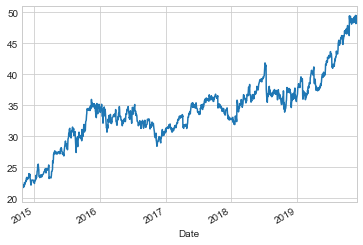

In [5]:
elisa['Closing price'].plot()

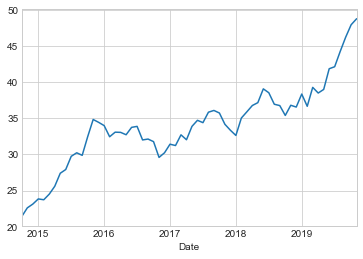

In [6]:
#kuukausittaiset keskiarvohinnat
elisa['Closing price'].resample('M').mean().plot()

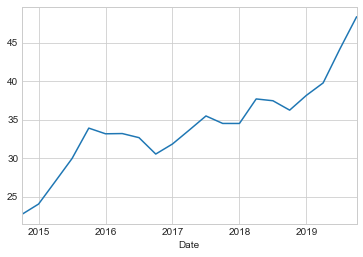

In [7]:
#vuosineljännesten keskiarvohinnat
elisa['Closing price'].resample('Q').mean().plot()

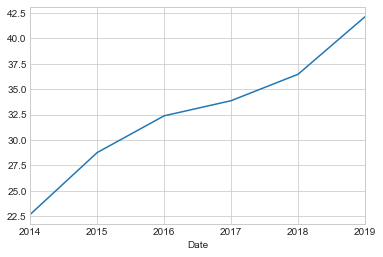

In [8]:
#vuosien keskiarvohinnat
elisa['Closing price'].resample('Y').mean().plot()

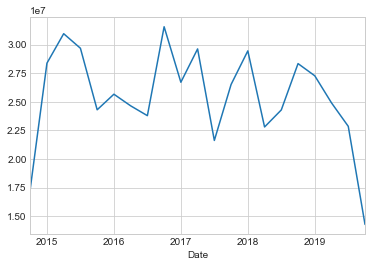

In [9]:
#vaihto osakkeiden lukumääränä vuosineljänneksittäin
elisa['Total volume'].resample('Q').sum().plot()

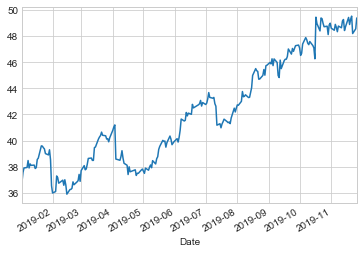

In [10]:
#vuoden 2019 alusta
ax1 = elisa['Closing price']['2019':].plot()

<h2>Liukuvia keskiarvoja</h2>

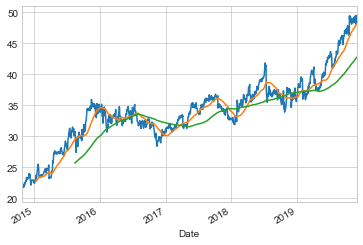

In [11]:
elisa['Closing price'].plot()

#liukuvia keskiarvoja
elisa['Closing price'].rolling(50).mean().plot()
elisa['Closing price'].rolling(200).mean().plot()

<h2>Muutosprosentit</h2>

In [12]:
#hinnan muutokset prosentteina edellisestä päivästä
elisa['Elisa%'] = elisa['Closing price'].pct_change()
telia['Telia%'] = telia['Closing price'].pct_change()

In [13]:
#Elisan ja Telian prosenttimuutokset samaan dataframeen
muutokset = pd.concat([elisa['Elisa%'], telia['Telia%']], axis=1)
muutokset.head()

,Elisa%,Telia%
Date,,
2014-10-27,NaN,NaN
2014-10-28,0.026442,0.021989
2014-10-29,0.003279,0.016838
2014-10-30,0.007937,0.004600
2014-10-31,0.014358,-0.004579


Text(0, 0.5, 'Muutos')

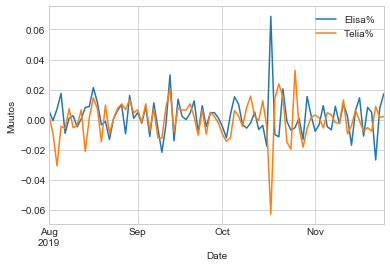

In [14]:
ax2 = muutokset['2019-08':].plot()

ax2.set_ylabel('Muutos')

#aika-akselin ticksien tuunaus
#ax2.xaxis.set_major_locator(myLoc)
#ax2.xaxis.set_major_formatter(myFmt)

In [15]:
#tunnuslukuja muutosprosenteille
muutokset.describe()

,Elisa%,Telia%
count,1278.000000,1278.000000
mean,0.000774,-0.000137
std,0.013910,0.012993
min,-0.092226,-0.079728
25%,-0.005976,-0.006884
50%,0.000866,-0.000489
75%,0.007699,0.007228
max,0.068757,0.083107


In [16]:
#päivät, jolloin muutosprosentti ollut suurempi kuin 5 %
muutokset[(abs(muutokset['Elisa%'])>0.05) | 
          (abs(muutokset['Telia%'])>0.05)]

,Elisa%,Telia%
Date,,
2015-03-27,-0.075697,-0.012712
2015-04-09,0.011499,-0.066554
2015-04-16,0.055984,0.006346
2015-08-24,-0.055172,-0.058611
2015-08-25,0.065693,0.047335
2015-09-03,0.057869,0.032323
2015-09-25,0.061796,0.025510
2016-01-22,0.051540,0.037919
2016-04-01,-0.052092,-0.009645


<h2>Onko viikonpäivällä yhteyttä tuottoprosenttiin?</h2>

In [17]:
#Viikonpäivät omaan sarakkeeseen (0=maanantai)
muutokset['Weekday'] = muutokset.index.weekday

muutokset.groupby('Weekday')['Elisa%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,254.0,0.001466,0.013028,-0.055172,-0.004571,0.001003,0.007644,0.057805
1,260.0,0.000673,0.012648,-0.036921,-0.007346,0.000315,0.007232,0.065693
2,259.0,0.000663,0.012319,-0.053899,-0.005080,0.000338,0.007498,0.058061
3,255.0,0.000887,0.015322,-0.074751,-0.006554,0.001081,0.008295,0.068757
4,250.0,0.000174,0.015995,-0.092226,-0.006363,0.001174,0.007727,0.061796


In [18]:
muutokset.groupby('Weekday')['Telia%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,254.0,-0.000325,0.013714,-0.079728,-0.006627,-0.001016,0.007110,0.039216
1,260.0,-0.000076,0.012170,-0.037550,-0.006818,-0.000851,0.006529,0.048600
2,259.0,0.000159,0.011563,-0.044934,-0.006035,-0.000498,0.007442,0.042407
3,255.0,-0.000790,0.013693,-0.066554,-0.007906,0.000000,0.007174,0.039604
4,250.0,0.000352,0.013786,-0.050542,-0.006867,0.000508,0.007694,0.083107


<h2>Muutosprosenttien välinen korrelaatio</h2>

In [19]:
#Elisan ja Telian muutosprosentit korreloivat positiivisesti
muutokset.drop('Weekday', axis=1).corr()

,Elisa%,Telia%
Elisa%,1.000000,0.461965
Telia%,0.461965,1.000000


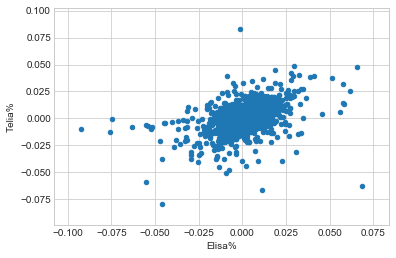

In [20]:
#muutosprosenttien positiivinen korrelaatio näkyy hyvin hajontakaaviossa
muutokset.plot.scatter(x='Elisa%', y='Telia%')

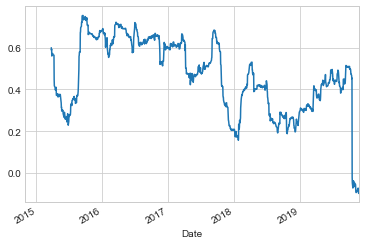

In [21]:
#liukuva korrelaatio kertoo miten muutosprosentit korreloivat eri aikoina:
muutokset['Elisa%'].rolling(100).corr(muutokset['Telia%']).plot()

<h2>Liukuva volatiliteetti</h2>

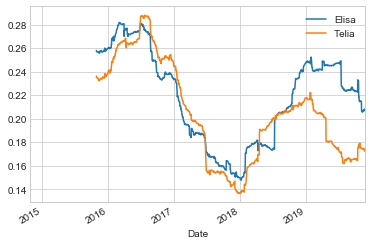

In [22]:
#volatiliteetti kertoo osakkeeseen sisältyvästä riskistä
#seuraavasta selviää, miten riski on vaihdellut ajan kuluessa
(muutokset['Elisa%'].rolling(252).std()*(252**0.5)).plot(label='Elisa', legend=True)
(muutokset['Telia%'].rolling(252).std()*(252**0.5)).plot(label='Telia', legend=True)

<h2>Kahden arvoakselin viivakaavio</h2>

(3, 6)

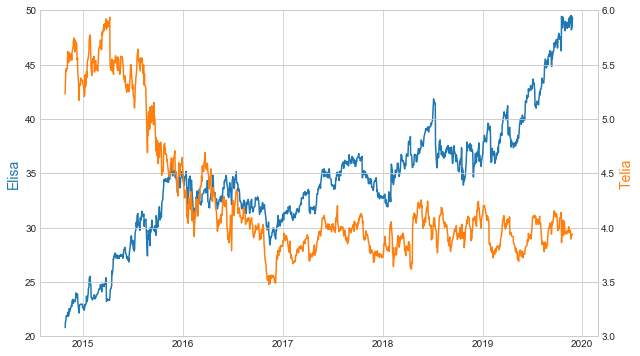

In [23]:
#luon figure- ja axes-oliot
fig, ax = plt.subplots(figsize = (10, 6))

#määritän ax1-olion
ax.set_ylabel('Elisa', color='C0', fontsize=14)
ax.plot(elisa['Closing price'], color='C0')
ax.set_ylim(20,50)

#luon Telialle toisen axes-olion, jolla on yhteinen x-akseli ax-olion kanssa
ax_T = ax.twinx()

ax_T.set_ylabel('Telia', color='C1', fontsize=14)
ax_T.plot(telia['Closing price'], color='C1')
ax_T.set_ylim(3,6)